In [1]:
import pandas as pd

In [2]:
# 导入相关库
import pandas as pd 
import matplotlib.pyplot as plt
# 这两行代码解决 plt 中文显示的问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# 由于采集的时候没有设置表头,此处设置表头
data = pd.read_excel('./销售数据.xlsx', header=None, names = ['comments','color','intro'] ) # 
data.head()

comments color          intro
0  手机隔天到货，是国行正品，价格很实惠，屏幕细腻，显示清楚，很有质感，大小刚刚好，手感很好，满...    绿色      全网通 128GB
1  用惯了安卓系统，用苹果真心不习惯。?第一次买苹果，真的什么鬼都没有～手机，卡针，数据线，无奈...    黑色       全网通 64GB
2  外形外观：不错\n拍照效果：好\n运行速度：快\n?宝贝收到了，很惊喜?，设计合理，做工真的...    白色      全网通 128GB
3  红色iPhone 12外观靓丽，大气，非常漂亮。给老婆买的跨年礼物，期待了很久，特别喜欢。发...    红色  128G+原装20W闪充头
4  手机很快收到了 APPleiPhone12的屏幕看起来太喜欢了，后感非常好，这应该是女生都喜...    紫色  128G+原装20W闪充头

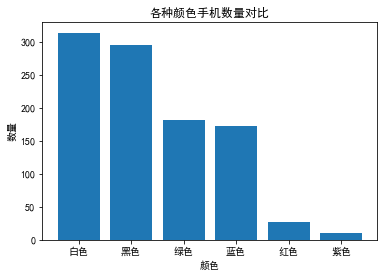

In [4]:
x = ['白色','黑色','绿色','蓝色','红色','紫色']
y = [314,295,181,173,27,10]
plt.bar(x,y)
plt.title('各种颜色手机数量对比')
plt.xlabel('颜色')
plt.ylabel('数量')
# plt.legend() # 显示图例
plt.show()

In [5]:
import xlrd
def strs(row):
    values = "";
    for i in range(len(row)):
        if i == len(row) - 1:
            values = values + str(row[i])
        else:
            values = values + str(row[i])
    return values
# 打卡文件
data = xlrd.open_workbook("./销售数据.xlsx")
sqlfile = open("data.txt", "a")  # 文件读写方式是追加
table = data.sheets()[0]  # 表头
nrows = table.nrows  # 行数
ncols = table.ncols  # 列数
colnames = table.row_values(1)  # 某一行数据
# 打印出行数列数
for ronum in range(1, nrows):
        row = table.cell_value(rowx=ronum, colx = 0) #只需要修改你要读取的列数-1
        values = strs(row)  # 调用函数，将行数据拼接成字符串
        sqlfile.writelines(values + "\n")  # 将字符串写入新文件
sqlfile.close()  # 关闭写入的文件

In [8]:
# 导入相应的库
import jieba
from PIL import Image
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# 导入文本数据并进行简单的文本处理
# 去掉换行符和空格
text = open("./data.txt",encoding='gbk').read()
text = text.replace('\n',"").replace("\u3000","")

# 分词，返回结果为词的列表
text_cut = jieba.lcut(text)
# 将分好的词用某个符号分割开连成字符串
text_cut = ' '.join(text_cut)

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\User\AppData\Local\Temp\jieba.cache
Loading model cost 2.088 seconds.
Prefix dict has been built successfully.


In [ ]:
word_list = jieba.cut(text)
space_word_list = ' '.join(word_list)
# print(space_word_list) 打印文字  可以省略
# 调用包PIL中的open方法，读取图片文件，通过numpy中的array方法生成数组
mask_pic = np.array(Image.open("./xin.png"))
word = WordCloud(
    font_path='C:/Windows/Fonts/simfang.ttf',  # 设置字体，本机的字体
    mask=mask_pic,  # 设置背景图片
    background_color='white',  # 设置背景颜色
    max_font_size=150,  # 设置字体最大值
    max_words=2000,  # 设置最大显示字数
    stopwords={'的'}  # 设置停用词，停用词则不在词云途中表示
                 ).generate(space_word_list)
image = word.to_image()
word.to_file('2.png')  # 保存图片
image.show()